In [ ]:
# https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/Ch2_MorePyMC_PyMC3.ipynb
# Cheating among students

import numpy as np
import pymc3 as pm
% matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import theano.tensor as tt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`


C:\Users\o00408152\AppData\Local\Programs\Python\Python36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\o00408152\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
N = 100
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)


In [3]:
with model:
    true_answers = pm.Bernoulli("truths", p, shape=N, testval=np.random.binomial(1, 0.5, N))


In [4]:
with model:
    first_coin_flips = pm.Bernoulli("first_flips", 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
print(first_coin_flips.tag.test_value)


[1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1]

In [5]:
with model:
    second_coin_flips = pm.Bernoulli("second_flips", 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))


In [6]:
with model:
    val = first_coin_flips * true_answers + (1 - first_coin_flips) * second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", tt.sum(val) / float(N))
observed_proportion.tag.test_value

array(0.52)

In [7]:
X = 35

with model:
    observations = pm.Binomial("obs", N, observed_proportion, observed=X)


In [8]:
observations.tag.test_value

array(35, dtype=int64)

In [9]:
with model:
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(40000, step=step)
    burned_trace = trace[15000:]


Multiprocess sampling (2 chains in 2 jobs)

CompoundStep

>Metropolis: [freq_cheating]

>BinaryGibbsMetropolis: [truths, first_flips, second_flips]

Sampling 2 chains:   0%|          | 0/81000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 1/81000 [00:02<45:09:24,  2.01s/draws]

Sampling 2 chains:   0%|          | 3/81000 [00:04<38:34:41,  1.71s/draws]

Sampling 2 chains:   0%|          | 5/81000 [00:06<33:37:55,  1.49s/draws]

Sampling 2 chains:   0%|          | 7/81000 [00:08<30:25:46,  1.35s/draws]

Sampling 2 chains:   0%|          | 9/81000 [00:10<28:20:10,  1.26s/draws]

Sampling 2 chains:   0%|          | 11/81000 [00:12<26:41:31,  1.19s/draws]

Sampling 2 chains:   0%|          | 13/81000 [00:14<25:20:06,  1.13s/draws]

Sampling 2 chains:   0%|          | 14/81000 [00:14<18:33:03,  1.21draws/s]

Sampling 2 chains:   0%|          | 15/81000 [00:16<26:13:11,  1.17s/draws]

Sampling 2 chains:   0%|          | 17/81000 [00:18<25:19:28,  1.13s/draws]

Sampling 2 chains:   0%|          | 18/81000 [00:18<18:44:45,  1.20draws/s]

Sampling 2 chains:   0%|          | 19/81000 [00:20<27:49:36,  1.24s/draws]

Sampling 2 chains:   0%|          | 21/81000 [00:22<26:27:46,  1.18s/draws]

Sampling 2 chains:   0%|          | 23/81000 [00:24<25:52:07,  1.15s/draws]

Sampling 2 chains:   0%|          | 25/81000 [00:26<24:57:48,  1.11s/draws]

Sampling 2 chains:   0%|          | 27/81000 [00:29<24:42:27,  1.10s/draws]

Sampling 2 chains:   0%|          | 29/81000 [00:31<24:57:36,  1.11s/draws]

Sampling 2 chains:   0%|          | 31/81000 [00:33<24:28:44,  1.09s/draws]

Sampling 2 chains:   0%|          | 33/81000 [00:35<24:09:19,  1.07s/draws]

Sampling 2 chains:   0%|          | 35/81000 [00:37<24:21:25,  1.08s/draws]

Sampling 2 chains:   0%|          | 36/81000 [00:37<18:16:15,  1.23draws/s]

Sampling 2 chains:   0%|          | 37/81000 [00:39<26:36:50,  1.18s/draws]

Sampling 2 chains:   0%|          | 39/81000 [00:42<25:50:17,  1.15s/draws]

Sampling 2 chains:   0%|          | 40/81000 [00:42<19:06:43,  1.18draws/s]

Sampling 2 chains:   0%|          | 41/81000 [00:44<26:49:51,  1.19s/draws]

Sampling 2 chains:   0%|          | 42/81000 [00:44<19:52:03,  1.13draws/s]

Sampling 2 chains:   0%|          | 43/81000 [00:46<26:05:28,  1.16s/draws]

Sampling 2 chains:   0%|          | 45/81000 [00:48<25:20:24,  1.13s/draws]

Sampling 2 chains:   0%|          | 46/81000 [00:48<18:36:53,  1.21draws/s]

Sampling 2 chains:   0%|          | 47/81000 [00:50<26:24:27,  1.17s/draws]

Sampling 2 chains:   0%|          | 48/81000 [00:50<19:43:59,  1.14draws/s]

Sampling 2 chains:   0%|          | 49/81000 [00:52<26:41:03,  1.19s/draws]

Sampling 2 chains:   0%|          | 51/81000 [00:54<25:45:29,  1.15s/draws]

Sampling 2 chains:   0%|          | 53/81000 [00:56<25:08:12,  1.12s/draws]

Sampling 2 chains:   0%|          | 55/81000 [00:58<24:55:39,  1.11s/draws]

Sampling 2 chains:   0%|          | 57/81000 [01:01<24:45:02,  1.10s/draws]

Sampling 2 chains:   0%|          | 58/81000 [01:01<18:44:54,  1.20draws/s]

Sampling 2 chains:   0%|          | 59/81000 [01:03<26:41:41,  1.19s/draws]

Sampling 2 chains:   0%|          | 61/81000 [01:05<25:59:50,  1.16s/draws]

Sampling 2 chains:   0%|          | 63/81000 [01:07<25:08:29,  1.12s/draws]

Sampling 2 chains:   0%|          | 64/81000 [01:07<18:35:49,  1.21draws/s]

Sampling 2 chains:   0%|          | 65/81000 [01:09<26:30:00,  1.18s/draws]

Sampling 2 chains:   0%|          | 66/81000 [01:09<20:24:40,  1.10draws/s]

Sampling 2 chains:   0%|          | 67/81000 [01:11<26:47:06,  1.19s/draws]

Sampling 2 chains:   0%|          | 68/81000 [01:12<20:23:42,  1.10draws/s]

Sampling 2 chains:   0%|          | 69/81000 [01:13<27:05:25,  1.21s/draws]

Sampling 2 chains:   0%|          | 70/81000 [01:14<21:02:00,  1.07draws/s]

Sampling 2 chains:   0%|          | 71/81000 [01:15<26:16:33,  1.17s/draws]

Sampling 2 chains:   0%|          | 72/81000 [01:16<20:23:45,  1.10draws/s]

Sampling 2 chains:   0%|          | 73/81000 [01:18<26:44:47,  1.19s/draws]

Sampling 2 chains:   0%|          | 74/81000 [01:18<21:04:33,  1.07draws/s]

Sampling 2 chains:   0%|          | 75/81000 [01:20<26:52:17,  1.20s/draws]

Sampling 2 chains:   0%|          | 76/81000 [01:20<20:05:03,  1.12draws/s]

Sampling 2 chains:   0%|          | 77/81000 [01:22<28:12:49,  1.26s/draws]

Sampling 2 chains:   0%|          | 79/81000 [01:24<26:53:37,  1.20s/draws]

Sampling 2 chains:   0%|          | 81/81000 [01:26<25:37:08,  1.14s/draws]

Sampling 2 chains:   0%|          | 82/81000 [01:26<18:37:39,  1.21draws/s]

Sampling 2 chains:   0%|          | 83/81000 [01:28<27:16:49,  1.21s/draws]

Sampling 2 chains:   0%|          | 84/81000 [01:29<20:14:57,  1.11draws/s]

Sampling 2 chains:   0%|          | 85/81000 [01:30<27:12:29,  1.21s/draws]

Sampling 2 chains:   0%|          | 86/81000 [01:31<20:12:19,  1.11draws/s]

Sampling 2 chains:   0%|          | 87/81000 [01:33<27:14:41,  1.21s/draws]

Sampling 2 chains:   0%|          | 88/81000 [01:33<20:00:05,  1.12draws/s]

Sampling 2 chains:   0%|          | 89/81000 [01:35<27:42:55,  1.23s/draws]

Sampling 2 chains:   0%|          | 90/81000 [01:35<20:24:18,  1.10draws/s]

Sampling 2 chains:   0%|          | 91/81000 [01:37<27:42:27,  1.23s/draws]

Sampling 2 chains:   0%|          | 92/81000 [01:37<20:29:38,  1.10draws/s]

Sampling 2 chains:   0%|          | 93/81000 [01:39<27:42:07,  1.23s/draws]

Sampling 2 chains:   0%|          | 95/81000 [01:41<26:34:16,  1.18s/draws]

Sampling 2 chains:   0%|          | 96/81000 [01:41<19:18:51,  1.16draws/s]

Sampling 2 chains:   0%|          | 97/81000 [01:43<26:44:26,  1.19s/draws]

Sampling 2 chains:   0%|          | 99/81000 [01:45<25:41:56,  1.14s/draws]

Sampling 2 chains:   0%|          | 101/81000 [01:47<24:44:14,  1.10s/draws]

Sampling 2 chains:   0%|          | 102/81000 [01:47<18:24:28,  1.22draws/s]

Sampling 2 chains:   0%|          | 103/81000 [01:49<26:05:30,  1.16s/draws]

Sampling 2 chains:   0%|          | 104/81000 [01:50<20:03:01,  1.12draws/s]

Sampling 2 chains:   0%|          | 105/81000 [01:52<27:01:32,  1.20s/draws]

Sampling 2 chains:   0%|          | 106/81000 [01:52<20:44:40,  1.08draws/s]

Sampling 2 chains:   0%|          | 107/81000 [01:54<27:07:12,  1.21s/draws]

Sampling 2 chains:   0%|          | 108/81000 [01:54<20:39:20,  1.09draws/s]

Sampling 2 chains:   0%|          | 109/81000 [01:56<27:09:31,  1.21s/draws]

Sampling 2 chains:   0%|          | 110/81000 [01:56<21:01:10,  1.07draws/s]

Sampling 2 chains:   0%|          | 111/81000 [01:58<26:11:59,  1.17s/draws]

Sampling 2 chains:   0%|          | 112/81000 [01:58<21:06:36,  1.06draws/s]

Sampling 2 chains:   0%|          | 113/81000 [02:00<26:45:17,  1.19s/draws]

Sampling 2 chains:   0%|          | 114/81000 [02:00<21:08:28,  1.06draws/s]

Sampling 2 chains:   0%|          | 115/81000 [02:02<26:38:54,  1.19s/draws]

Sampling 2 chains:   0%|          | 116/81000 [02:03<20:55:54,  1.07draws/s]

Sampling 2 chains:   0%|          | 117/81000 [02:04<26:56:46,  1.20s/draws]

Sampling 2 chains:   0%|          | 118/81000 [02:05<20:59:31,  1.07draws/s]

Sampling 2 chains:   0%|          | 119/81000 [02:06<27:01:18,  1.20s/draws]

Sampling 2 chains:   0%|          | 120/81000 [02:07<20:48:32,  1.08draws/s]

Sampling 2 chains:   0%|          | 121/81000 [02:09<26:54:24,  1.20s/draws]

Sampling 2 chains:   0%|          | 122/81000 [02:09<20:17:01,  1.11draws/s]

Sampling 2 chains:   0%|          | 123/81000 [02:11<26:59:01,  1.20s/draws]

Sampling 2 chains:   0%|          | 125/81000 [02:13<25:52:13,  1.15s/draws]

Sampling 2 chains:   0%|          | 127/81000 [02:15<24:56:57,  1.11s/draws]

Sampling 2 chains:   0%|          | 129/81000 [02:17<24:33:01,  1.09s/draws]

Sampling 2 chains:   0%|          | 131/81000 [02:19<24:33:14,  1.09s/draws]

Sampling 2 chains:   0%|          | 133/81000 [02:21<24:09:43,  1.08s/draws]

Sampling 2 chains:   0%|          | 134/81000 [02:21<17:52:37,  1.26draws/s]

Sampling 2 chains:   0%|          | 135/81000 [02:23<25:53:24,  1.15s/draws]

Sampling 2 chains:   0%|          | 136/81000 [02:24<20:09:04,  1.11draws/s]

Sampling 2 chains:   0%|          | 137/81000 [02:26<27:44:40,  1.24s/draws]

Sampling 2 chains:   0%|          | 138/81000 [02:26<20:35:12,  1.09draws/s]

Sampling 2 chains:   0%|          | 139/81000 [02:28<28:06:59,  1.25s/draws]

Sampling 2 chains:   0%|          | 140/81000 [02:28<21:23:09,  1.05draws/s]

Sampling 2 chains:   0%|          | 141/81000 [02:30<28:31:38,  1.27s/draws]

Sampling 2 chains:   0%|          | 142/81000 [02:30<22:18:25,  1.01draws/s]

Sampling 2 chains:   0%|          | 143/81000 [02:32<28:55:20,  1.29s/draws]

Sampling 2 chains:   0%|          | 144/81000 [02:33<22:02:16,  1.02draws/s]

Sampling 2 chains:   0%|          | 145/81000 [02:35<28:33:54,  1.27s/draws]

Sampling 2 chains:   0%|          | 146/81000 [02:35<20:42:34,  1.08draws/s]

Sampling 2 chains:   0%|          | 147/81000 [02:37<28:51:41,  1.29s/draws]

Sampling 2 chains:   0%|          | 148/81000 [02:37<20:54:12,  1.07draws/s]

Sampling 2 chains:   0%|          | 149/81000 [02:39<28:24:38,  1.27s/draws]

Sampling 2 chains:   0%|          | 150/81000 [02:39<20:38:30,  1.09draws/s]

Sampling 2 chains:   0%|          | 151/81000 [02:41<28:27:46,  1.27s/draws]

Sampling 2 chains:   0%|          | 153/81000 [02:43<26:56:13,  1.20s/draws]

Sampling 2 chains:   0%|          | 154/81000 [02:43<19:41:27,  1.14draws/s]

Sampling 2 chains:   0%|          | 155/81000 [02:46<27:49:00,  1.24s/draws]

Sampling 2 chains:   0%|          | 156/81000 [02:46<20:11:08,  1.11draws/s]

Sampling 2 chains:   0%|          | 157/81000 [02:48<26:57:24,  1.20s/draws]

Sampling 2 chains:   0%|          | 158/81000 [02:48<19:54:25,  1.13draws/s]

Sampling 2 chains:   0%|          | 159/81000 [02:50<27:13:35,  1.21s/draws]

Sampling 2 chains:   0%|          | 160/81000 [02:50<19:53:36,  1.13draws/s]

Sampling 2 chains:   0%|          | 161/81000 [02:52<27:24:43,  1.22s/draws]

Sampling 2 chains:   0%|          | 163/81000 [02:54<26:21:19,  1.17s/draws]

Sampling 2 chains:   0%|          | 165/81000 [02:56<25:26:38,  1.13s/draws]

Sampling 2 chains:   0%|          | 167/81000 [02:58<24:53:23,  1.11s/draws]

Sampling 2 chains:   0%|          | 169/81000 [03:00<24:34:46,  1.09s/draws]

Sampling 2 chains:   0%|          | 171/81000 [03:02<23:49:10,  1.06s/draws]

Sampling 2 chains:   0%|          | 172/81000 [03:02<17:22:50,  1.29draws/s]

Sampling 2 chains:   0%|          | 173/81000 [03:04<24:41:40,  1.10s/draws]

Sampling 2 chains:   0%|          | 174/81000 [03:04<18:24:14,  1.22draws/s]

Sampling 2 chains:   0%|          | 175/81000 [03:06<25:33:07,  1.14s/draws]

Sampling 2 chains:   0%|          | 176/81000 [03:06<19:27:19,  1.15draws/s]

Sampling 2 chains:   0%|          | 177/81000 [03:08<25:56:39,  1.16s/draws]

Sampling 2 chains:   0%|          | 178/81000 [03:08<19:40:09,  1.14draws/s]

Sampling 2 chains:   0%|          | 179/81000 [03:10<26:45:37,  1.19s/draws]

Sampling 2 chains:   0%|          | 180/81000 [03:11<20:18:04,  1.11draws/s]

Sampling 2 chains:   0%|          | 181/81000 [03:13<27:27:05,  1.22s/draws]

Sampling 2 chains:   0%|          | 182/81000 [03:13<20:24:28,  1.10draws/s]

Sampling 2 chains:   0%|          | 183/81000 [03:15<27:29:07,  1.22s/draws]

Sampling 2 chains:   0%|          | 184/81000 [03:15<20:33:58,  1.09draws/s]

Sampling 2 chains:   0%|          | 185/81000 [03:17<28:57:47,  1.29s/draws]

Sampling 2 chains:   0%|          | 187/81000 [03:19<27:20:53,  1.22s/draws]

Sampling 2 chains:   0%|          | 189/81000 [03:21<26:22:33,  1.18s/draws]

Sampling 2 chains:   0%|          | 191/81000 [03:24<25:50:23,  1.15s/draws]

Sampling 2 chains:   0%|          | 193/81000 [03:26<24:47:39,  1.10s/draws]

Sampling 2 chains:   0%|          | 195/81000 [03:28<24:23:08,  1.09s/draws]

Sampling 2 chains:   0%|          | 196/81000 [03:28<18:11:15,  1.23draws/s]

Sampling 2 chains:   0%|          | 197/81000 [03:30<25:46:26,  1.15s/draws]

Sampling 2 chains:   0%|          | 198/81000 [03:30<19:16:25,  1.16draws/s]

Sampling 2 chains:   0%|          | 199/81000 [03:32<26:27:36,  1.18s/draws]

Sampling 2 chains:   0%|          | 201/81000 [03:34<26:00:32,  1.16s/draws]

Sampling 2 chains:   0%|          | 203/81000 [03:36<25:43:23,  1.15s/draws]

Sampling 2 chains:   0%|          | 205/81000 [03:38<25:00:04,  1.11s/draws]

Sampling 2 chains:   0%|          | 207/81000 [03:40<24:38:38,  1.10s/draws]

Sampling 2 chains:   0%|          | 209/81000 [03:43<24:28:03,  1.09s/draws]

Sampling 2 chains:   0%|          | 211/81000 [03:45<24:04:05,  1.07s/draws]

Sampling 2 chains:   0%|          | 213/81000 [03:47<23:47:05,  1.06s/draws]

Sampling 2 chains:   0%|          | 214/81000 [03:47<17:44:47,  1.26draws/s]

Sampling 2 chains:   0%|          | 215/81000 [03:49<25:54:48,  1.15s/draws]

Sampling 2 chains:   0%|          | 216/81000 [03:49<19:12:58,  1.17draws/s]

Sampling 2 chains:   0%|          | 217/81000 [03:51<26:18:33,  1.17s/draws]

Sampling 2 chains:   0%|          | 218/81000 [03:51<19:53:25,  1.13draws/s]

Sampling 2 chains:   0%|          | 219/81000 [03:53<26:22:12,  1.18s/draws]

Sampling 2 chains:   0%|          | 220/81000 [03:53<19:58:00,  1.12draws/s]

Sampling 2 chains:   0%|          | 221/81000 [03:55<26:37:30,  1.19s/draws]

Sampling 2 chains:   0%|          | 222/81000 [03:55<19:21:03,  1.16draws/s]

Sampling 2 chains:   0%|          | 223/81000 [03:57<27:40:04,  1.23s/draws]

Sampling 2 chains:   0%|          | 224/81000 [03:57<20:04:26,  1.12draws/s]

Sampling 2 chains:   0%|          | 225/81000 [04:00<28:44:45,  1.28s/draws]

Sampling 2 chains:   0%|          | 227/81000 [04:02<27:23:28,  1.22s/draws]

Sampling 2 chains:   0%|          | 229/81000 [04:04<26:26:46,  1.18s/draws]

Sampling 2 chains:   0%|          | 231/81000 [04:06<25:40:36,  1.14s/draws]

Sampling 2 chains:   0%|          | 233/81000 [04:08<25:19:47,  1.13s/draws]

Sampling 2 chains:   0%|          | 235/81000 [04:11<25:18:44,  1.13s/draws]

Sampling 2 chains:   0%|          | 237/81000 [04:13<24:56:10,  1.11s/draws]

Sampling 2 chains:   0%|          | 239/81000 [04:15<24:17:46,  1.08s/draws]

Sampling 2 chains:   0%|          | 240/81000 [04:15<17:43:13,  1.27draws/s]

Sampling 2 chains:   0%|          | 241/81000 [04:17<24:40:46,  1.10s/draws]

Sampling 2 chains:   0%|          | 242/81000 [04:17<19:22:06,  1.16draws/s]

Sampling 2 chains:   0%|          | 243/81000 [04:19<25:53:11,  1.15s/draws]

Sampling 2 chains:   0%|          | 244/81000 [04:19<20:28:32,  1.10draws/s]

Sampling 2 chains:   0%|          | 245/81000 [04:21<27:00:16,  1.20s/draws]

Sampling 2 chains:   0%|          | 246/81000 [04:21<20:18:10,  1.10draws/s]

Sampling 2 chains:   0%|          | 247/81000 [04:23<27:02:41,  1.21s/draws]

Sampling 2 chains:   0%|          | 248/81000 [04:23<20:03:41,  1.12draws/s]

Sampling 2 chains:   0%|          | 249/81000 [04:25<27:13:32,  1.21s/draws]

Sampling 2 chains:   0%|          | 250/81000 [04:25<20:14:55,  1.11draws/s]

Sampling 2 chains:   0%|          | 251/81000 [04:28<29:12:48,  1.30s/draws]

Sampling 2 chains:   0%|          | 252/81000 [04:28<21:27:06,  1.05draws/s]

Sampling 2 chains:   0%|          | 253/81000 [04:31<34:18:04,  1.53s/draws]

Sampling 2 chains:   0%|          | 254/81000 [04:31<25:18:57,  1.13s/draws]

Sampling 2 chains:   0%|          | 255/81000 [04:34<37:12:02,  1.66s/draws]

Sampling 2 chains:   0%|          | 257/81000 [04:37<37:00:02,  1.65s/draws]

Sampling 2 chains:   0%|          | 259/81000 [04:40<34:55:57,  1.56s/draws]

Sampling 2 chains:   0%|          | 261/81000 [04:42<31:29:12,  1.40s/draws]

Sampling 2 chains:   0%|          | 263/81000 [04:44<28:33:58,  1.27s/draws]

Sampling 2 chains:   0%|          | 264/81000 [04:44<21:56:26,  1.02draws/s]

Sampling 2 chains:   0%|          | 265/81000 [04:46<28:34:18,  1.27s/draws]

Sampling 2 chains:   0%|          | 266/81000 [04:46<20:45:12,  1.08draws/s]

Sampling 2 chains:   0%|          | 267/81000 [04:48<27:25:03,  1.22s/draws]

Sampling 2 chains:   0%|          | 268/81000 [04:48<20:20:09,  1.10draws/s]

Sampling 2 chains:   0%|          | 269/81000 [04:50<27:38:34,  1.23s/draws]

Sampling 2 chains:   0%|          | 271/81000 [04:52<26:49:37,  1.20s/draws]

Sampling 2 chains:   0%|          | 273/81000 [04:55<25:46:05,  1.15s/draws]

Sampling 2 chains:   0%|          | 275/81000 [04:57<25:13:06,  1.12s/draws]

Sampling 2 chains:   0%|          | 277/81000 [04:59<25:00:30,  1.12s/draws]

Sampling 2 chains:   0%|          | 279/81000 [05:01<24:37:20,  1.10s/draws]

Sampling 2 chains:   0%|          | 281/81000 [05:03<24:39:28,  1.10s/draws]

Sampling 2 chains:   0%|          | 282/81000 [05:03<17:57:35,  1.25draws/s]

Sampling 2 chains:   0%|          | 283/81000 [05:05<26:18:49,  1.17s/draws]

Sampling 2 chains:   0%|          | 285/81000 [05:07<25:33:32,  1.14s/draws]

Sampling 2 chains:   0%|          | 286/81000 [05:08<18:52:47,  1.19draws/s]

Sampling 2 chains:   0%|          | 287/81000 [05:10<26:23:31,  1.18s/draws]

Sampling 2 chains:   0%|          | 288/81000 [05:10<19:40:41,  1.14draws/s]

Sampling 2 chains:   0%|          | 289/81000 [05:12<27:21:39,  1.22s/draws]

Sampling 2 chains:   0%|          | 291/81000 [05:14<26:05:23,  1.16s/draws]

Sampling 2 chains:   0%|          | 293/81000 [05:16<25:17:14,  1.13s/draws]

Sampling 2 chains:   0%|          | 295/81000 [05:18<24:55:37,  1.11s/draws]

Sampling 2 chains:   0%|          | 297/81000 [05:20<24:27:46,  1.09s/draws]

Sampling 2 chains:   0%|          | 299/81000 [05:22<24:16:57,  1.08s/draws]

Sampling 2 chains:   0%|          | 301/81000 [05:24<24:03:06,  1.07s/draws]

Sampling 2 chains:   0%|          | 302/81000 [05:24<17:39:47,  1.27draws/s]

Sampling 2 chains:   0%|          | 303/81000 [05:27<26:39:15,  1.19s/draws]

Sampling 2 chains:   0%|          | 305/81000 [05:29<25:52:46,  1.15s/draws]

Sampling 2 chains:   0%|          | 307/81000 [05:31<25:20:02,  1.13s/draws]

Sampling 2 chains:   0%|          | 309/81000 [05:33<24:56:06,  1.11s/draws]

Sampling 2 chains:   0%|          | 311/81000 [05:35<24:17:44,  1.08s/draws]

Sampling 2 chains:   0%|          | 313/81000 [05:37<23:51:05,  1.06s/draws]

Sampling 2 chains:   0%|          | 315/81000 [05:39<23:24:33,  1.04s/draws]

Sampling 2 chains:   0%|          | 316/81000 [05:39<17:39:25,  1.27draws/s]

Sampling 2 chains:   0%|          | 317/81000 [05:41<25:12:55,  1.13s/draws]

Sampling 2 chains:   0%|          | 318/81000 [05:41<19:23:30,  1.16draws/s]

Sampling 2 chains:   0%|          | 319/81000 [05:43<25:54:41,  1.16s/draws]

Sampling 2 chains:   0%|          | 320/81000 [05:44<20:12:31,  1.11draws/s]

Sampling 2 chains:   0%|          | 321/81000 [05:45<25:42:59,  1.15s/draws]

Sampling 2 chains:   0%|          | 322/81000 [05:46<21:22:35,  1.05draws/s]

Sampling 2 chains:   0%|          | 323/81000 [05:47<26:04:35,  1.16s/draws]

Sampling 2 chains:   0%|          | 324/81000 [05:48<21:34:04,  1.04draws/s]

Sampling 2 chains:   0%|          | 325/81000 [05:50<26:26:44,  1.18s/draws]

Sampling 2 chains:   0%|          | 326/81000 [05:50<21:09:13,  1.06draws/s]

Sampling 2 chains:   0%|          | 327/81000 [05:52<26:41:11,  1.19s/draws]

Sampling 2 chains:   0%|          | 328/81000 [05:52<21:49:59,  1.03draws/s]

Sampling 2 chains:   0%|          | 329/81000 [05:54<27:16:34,  1.22s/draws]

Sampling 2 chains:   0%|          | 330/81000 [05:55<22:12:44,  1.01draws/s]

Sampling 2 chains:   0%|          | 331/81000 [05:56<27:16:44,  1.22s/draws]

Sampling 2 chains:   0%|          | 332/81000 [05:57<22:08:00,  1.01draws/s]

Sampling 2 chains:   0%|          | 333/81000 [05:58<27:02:55,  1.21s/draws]

Sampling 2 chains:   0%|          | 334/81000 [05:59<21:10:20,  1.06draws/s]

Sampling 2 chains:   0%|          | 335/81000 [06:01<26:38:40,  1.19s/draws]

Sampling 2 chains:   0%|          | 336/81000 [06:01<21:00:13,  1.07draws/s]

Sampling 2 chains:   0%|          | 337/81000 [06:03<27:02:37,  1.21s/draws]

Sampling 2 chains:   0%|          | 338/81000 [06:03<21:59:44,  1.02draws/s]

Sampling 2 chains:   0%|          | 339/81000 [06:05<27:23:42,  1.22s/draws]

Sampling 2 chains:   0%|          | 340/81000 [06:06<23:02:52,  1.03s/draws]

Sampling 2 chains:   0%|          | 341/81000 [06:07<27:23:55,  1.22s/draws]

Sampling 2 chains:   0%|          | 342/81000 [06:08<23:11:29,  1.04s/draws]

Sampling 2 chains:   0%|          | 343/81000 [06:10<27:45:16,  1.24s/draws]

Sampling 2 chains:   0%|          | 344/81000 [06:10<23:50:13,  1.06s/draws]

Sampling 2 chains:   0%|          | 345/81000 [06:12<27:58:14,  1.25s/draws]

Sampling 2 chains:   0%|          | 346/81000 [06:12<22:41:28,  1.01s/draws]

Sampling 2 chains:   0%|          | 347/81000 [06:14<27:41:33,  1.24s/draws]

Sampling 2 chains:   0%|          | 348/81000 [06:15<22:47:55,  1.02s/draws]

Sampling 2 chains:   0%|          | 349/81000 [06:16<26:25:48,  1.18s/draws]

Sampling 2 chains:   0%|          | 350/81000 [06:17<22:21:06,  1.00draws/s]

Sampling 2 chains:   0%|          | 351/81000 [06:18<25:32:20,  1.14s/draws]

Sampling 2 chains:   0%|          | 352/81000 [06:19<21:50:56,  1.03draws/s]

Sampling 2 chains:   0%|          | 353/81000 [06:20<26:47:10,  1.20s/draws]

Sampling 2 chains:   0%|          | 354/81000 [06:21<22:50:10,  1.02s/draws]

Sampling 2 chains:   0%|          | 355/81000 [06:23<26:35:24,  1.19s/draws]

Sampling 2 chains:   0%|          | 356/81000 [06:23<22:02:00,  1.02draws/s]

Sampling 2 chains:   0%|          | 357/81000 [06:25<26:39:58,  1.19s/draws]

Sampling 2 chains:   0%|          | 358/81000 [06:25<21:34:09,  1.04draws/s]

Sampling 2 chains:   0%|          | 359/81000 [06:27<26:21:40,  1.18s/draws]

Sampling 2 chains:   0%|          | 360/81000 [06:27<20:18:50,  1.10draws/s]

Sampling 2 chains:   0%|          | 361/81000 [06:29<27:17:47,  1.22s/draws]

Sampling 2 chains:   0%|          | 362/81000 [06:29<20:41:59,  1.08draws/s]

Sampling 2 chains:   0%|          | 363/81000 [06:31<27:46:53,  1.24s/draws]

Sampling 2 chains:   0%|          | 364/81000 [06:32<20:48:39,  1.08draws/s]

Sampling 2 chains:   0%|          | 365/81000 [06:33<26:58:42,  1.20s/draws]

Sampling 2 chains:   0%|          | 366/81000 [06:34<21:12:34,  1.06draws/s]

Sampling 2 chains:   0%|          | 367/81000 [06:36<27:02:32,  1.21s/draws]

Sampling 2 chains:   0%|          | 368/81000 [06:36<21:25:20,  1.05draws/s]

Sampling 2 chains:   0%|          | 369/81000 [06:38<26:08:57,  1.17s/draws]

Sampling 2 chains:   0%|          | 370/81000 [06:38<21:15:38,  1.05draws/s]

Sampling 2 chains:   0%|          | 371/81000 [06:40<25:57:19,  1.16s/draws]

Sampling 2 chains:   0%|          | 372/81000 [06:40<21:32:53,  1.04draws/s]

Sampling 2 chains:   0%|          | 373/81000 [06:42<25:39:57,  1.15s/draws]

Sampling 2 chains:   0%|          | 374/81000 [06:42<21:05:24,  1.06draws/s]

Sampling 2 chains:   0%|          | 375/81000 [06:44<25:03:45,  1.12s/draws]

Sampling 2 chains:   0%|          | 376/81000 [06:44<21:43:21,  1.03draws/s]

Sampling 2 chains:   0%|          | 377/81000 [06:46<25:19:01,  1.13s/draws]

Sampling 2 chains:   0%|          | 378/81000 [06:47<21:44:22,  1.03draws/s]

Sampling 2 chains:   0%|          | 379/81000 [06:48<25:54:23,  1.16s/draws]

Sampling 2 chains:   0%|          | 380/81000 [06:49<21:13:53,  1.05draws/s]

Sampling 2 chains:   0%|          | 381/81000 [06:50<26:19:23,  1.18s/draws]

Sampling 2 chains:   0%|          | 382/81000 [06:51<22:27:00,  1.00s/draws]

Sampling 2 chains:   0%|          | 383/81000 [06:53<27:26:40,  1.23s/draws]

Sampling 2 chains:   0%|          | 384/81000 [06:53<21:11:34,  1.06draws/s]

Sampling 2 chains:   0%|          | 385/81000 [06:55<26:28:37,  1.18s/draws]

Sampling 2 chains:   0%|          | 386/81000 [06:55<21:09:37,  1.06draws/s]

Sampling 2 chains:   0%|          | 387/81000 [06:57<26:30:03,  1.18s/draws]

Sampling 2 chains:   0%|          | 388/81000 [06:57<20:45:13,  1.08draws/s]

Sampling 2 chains:   0%|          | 389/81000 [06:59<25:58:51,  1.16s/draws]

Sampling 2 chains:   0%|          | 390/81000 [06:59<21:21:25,  1.05draws/s]

Sampling 2 chains:   0%|          | 391/81000 [07:01<25:51:56,  1.16s/draws]

Sampling 2 chains:   0%|          | 392/81000 [07:01<20:51:11,  1.07draws/s]

Sampling 2 chains:   0%|          | 393/81000 [07:03<26:28:23,  1.18s/draws]

Sampling 2 chains:   0%|          | 394/81000 [07:03<20:26:43,  1.10draws/s]

Sampling 2 chains:   0%|          | 395/81000 [07:05<26:35:01,  1.19s/draws]

Sampling 2 chains:   0%|          | 396/81000 [07:06<20:48:41,  1.08draws/s]

Sampling 2 chains:   0%|          | 397/81000 [07:07<25:47:06,  1.15s/draws]

Sampling 2 chains:   0%|          | 398/81000 [07:08<20:14:44,  1.11draws/s]

Sampling 2 chains:   0%|          | 399/81000 [07:09<26:23:46,  1.18s/draws]

Sampling 2 chains:   0%|          | 400/81000 [07:10<21:15:52,  1.05draws/s]

Sampling 2 chains:   0%|          | 401/81000 [07:12<27:25:29,  1.22s/draws]

Sampling 2 chains:   0%|          | 402/81000 [07:12<21:52:37,  1.02draws/s]

Sampling 2 chains:   0%|          | 403/81000 [07:14<27:21:46,  1.22s/draws]

Sampling 2 chains:   0%|          | 404/81000 [07:14<21:37:55,  1.03draws/s]

Sampling 2 chains:   0%|          | 405/81000 [07:16<26:52:32,  1.20s/draws]

Sampling 2 chains:   1%|          | 406/81000 [07:16<21:50:30,  1.02draws/s]

Sampling 2 chains:   1%|          | 407/81000 [07:18<27:02:31,  1.21s/draws]

Sampling 2 chains:   1%|          | 408/81000 [07:19<21:57:53,  1.02draws/s]

Sampling 2 chains:   1%|          | 409/81000 [07:20<26:47:08,  1.20s/draws]

Sampling 2 chains:   1%|          | 410/81000 [07:21<22:19:20,  1.00draws/s]

Sampling 2 chains:   1%|          | 411/81000 [07:22<25:47:35,  1.15s/draws]

Sampling 2 chains:   1%|          | 412/81000 [07:23<21:46:31,  1.03draws/s]

Sampling 2 chains:   1%|          | 413/81000 [07:24<24:58:48,  1.12s/draws]

Sampling 2 chains:   1%|          | 414/81000 [07:25<21:45:25,  1.03draws/s]

Sampling 2 chains:   1%|          | 415/81000 [07:26<25:06:53,  1.12s/draws]

Sampling 2 chains:   1%|          | 416/81000 [07:27<22:15:14,  1.01draws/s]

Sampling 2 chains:   1%|          | 417/81000 [07:29<25:05:59,  1.12s/draws]

Sampling 2 chains:   1%|          | 418/81000 [07:29<21:35:07,  1.04draws/s]

Sampling 2 chains:   1%|          | 419/81000 [07:31<25:50:49,  1.15s/draws]

Sampling 2 chains:   1%|          | 420/81000 [07:31<20:56:47,  1.07draws/s]

Sampling 2 chains:   1%|          | 421/81000 [07:33<25:44:55,  1.15s/draws]

Sampling 2 chains:   1%|          | 422/81000 [07:33<20:21:14,  1.10draws/s]

Sampling 2 chains:   1%|          | 423/81000 [07:35<27:31:21,  1.23s/draws]

Sampling 2 chains:   1%|          | 424/81000 [07:36<22:01:31,  1.02draws/s]

Sampling 2 chains:   1%|          | 425/81000 [07:37<27:23:22,  1.22s/draws]

Sampling 2 chains:   1%|          | 426/81000 [07:38<21:44:38,  1.03draws/s]

Sampling 2 chains:   1%|          | 427/81000 [07:39<26:35:17,  1.19s/draws]

Sampling 2 chains:   1%|          | 428/81000 [07:40<21:43:37,  1.03draws/s]

Sampling 2 chains:   1%|          | 429/81000 [07:42<26:25:41,  1.18s/draws]

Sampling 2 chains:   1%|          | 430/81000 [07:42<21:45:45,  1.03draws/s]

Sampling 2 chains:   1%|          | 431/81000 [07:44<25:55:45,  1.16s/draws]

Sampling 2 chains:   1%|          | 432/81000 [07:44<21:06:15,  1.06draws/s]

Sampling 2 chains:   1%|          | 433/81000 [07:46<25:13:59,  1.13s/draws]

Sampling 2 chains:   1%|          | 434/81000 [07:46<21:58:23,  1.02draws/s]

Sampling 2 chains:   1%|          | 435/81000 [07:48<25:41:12,  1.15s/draws]

Sampling 2 chains:   1%|          | 436/81000 [07:48<22:23:53,  1.00s/draws]

Sampling 2 chains:   1%|          | 437/81000 [07:50<25:48:09,  1.15s/draws]

Sampling 2 chains:   1%|          | 438/81000 [07:51<22:56:56,  1.03s/draws]

Sampling 2 chains:   1%|          | 439/81000 [07:52<25:23:20,  1.13s/draws]

Sampling 2 chains:   1%|          | 440/81000 [07:53<22:49:13,  1.02s/draws]

Sampling 2 chains:   1%|          | 441/81000 [07:54<24:57:23,  1.12s/draws]

Sampling 2 chains:   1%|          | 442/81000 [07:55<22:05:16,  1.01draws/s]

Sampling 2 chains:   1%|          | 443/81000 [07:56<24:55:36,  1.11s/draws]

Sampling 2 chains:   1%|          | 444/81000 [07:57<21:45:29,  1.03draws/s]

Sampling 2 chains:   1%|          | 445/81000 [07:58<24:30:04,  1.09s/draws]

Sampling 2 chains:   1%|          | 446/81000 [07:59<21:47:21,  1.03draws/s]

Sampling 2 chains:   1%|          | 447/81000 [08:01<25:34:59,  1.14s/draws]

Sampling 2 chains:   1%|          | 448/81000 [08:01<21:35:11,  1.04draws/s]

Sampling 2 chains:   1%|          | 449/81000 [08:03<25:06:43,  1.12s/draws]

Sampling 2 chains:   1%|          | 450/81000 [08:03<21:26:16,  1.04draws/s]

Sampling 2 chains:   1%|          | 451/81000 [08:05<25:37:55,  1.15s/draws]

Sampling 2 chains:   1%|          | 452/81000 [08:05<21:27:10,  1.04draws/s]

Sampling 2 chains:   1%|          | 453/81000 [08:07<24:55:26,  1.11s/draws]

Sampling 2 chains:   1%|          | 454/81000 [08:07<21:28:26,  1.04draws/s]

Sampling 2 chains:   1%|          | 455/81000 [08:09<24:28:55,  1.09s/draws]

Sampling 2 chains:   1%|          | 456/81000 [08:10<22:06:15,  1.01draws/s]

Sampling 2 chains:   1%|          | 457/81000 [08:11<25:17:08,  1.13s/draws]

Sampling 2 chains:   1%|          | 458/81000 [08:12<21:26:17,  1.04draws/s]

Sampling 2 chains:   1%|          | 459/81000 [08:13<25:24:35,  1.14s/draws]

Sampling 2 chains:   1%|          | 460/81000 [08:14<21:55:15,  1.02draws/s]

Sampling 2 chains:   1%|          | 461/81000 [08:15<25:33:10,  1.14s/draws]

Sampling 2 chains:   1%|          | 462/81000 [08:16<22:09:18,  1.01draws/s]

Sampling 2 chains:   1%|          | 463/81000 [08:17<24:57:29,  1.12s/draws]

Sampling 2 chains:   1%|          | 464/81000 [08:18<21:59:38,  1.02draws/s]

Sampling 2 chains:   1%|          | 465/81000 [08:19<25:51:06,  1.16s/draws]

Sampling 2 chains:   1%|          | 466/81000 [08:20<21:39:10,  1.03draws/s]

Sampling 2 chains:   1%|          | 467/81000 [08:22<26:26:41,  1.18s/draws]

Sampling 2 chains:   1%|          | 468/81000 [08:22<22:17:22,  1.00draws/s]

Sampling 2 chains:   1%|          | 469/81000 [08:24<25:53:00,  1.16s/draws]

Sampling 2 chains:   1%|          | 470/81000 [08:24<21:24:47,  1.04draws/s]

Sampling 2 chains:   1%|          | 471/81000 [08:26<25:32:18,  1.14s/draws]

Sampling 2 chains:   1%|          | 472/81000 [08:26<21:46:56,  1.03draws/s]

Sampling 2 chains:   1%|          | 473/81000 [08:28<25:29:15,  1.14s/draws]

Sampling 2 chains:   1%|          | 474/81000 [08:29<22:16:36,  1.00draws/s]

Sampling 2 chains:   1%|          | 475/81000 [08:30<25:39:57,  1.15s/draws]

Sampling 2 chains:   1%|          | 476/81000 [08:31<22:58:42,  1.03s/draws]

Sampling 2 chains:   1%|          | 477/81000 [08:32<24:25:08,  1.09s/draws]

Sampling 2 chains:   1%|          | 478/81000 [08:33<22:36:07,  1.01s/draws]

Sampling 2 chains:   1%|          | 479/81000 [08:34<24:26:37,  1.09s/draws]

Sampling 2 chains:   1%|          | 480/81000 [08:35<23:00:06,  1.03s/draws]

Sampling 2 chains:   1%|          | 481/81000 [08:36<25:18:01,  1.13s/draws]

Sampling 2 chains:   1%|          | 482/81000 [08:37<23:20:46,  1.04s/draws]

Sampling 2 chains:   1%|          | 483/81000 [08:39<24:45:22,  1.11s/draws]

Sampling 2 chains:   1%|          | 484/81000 [08:39<23:07:58,  1.03s/draws]

Sampling 2 chains:   1%|          | 485/81000 [08:41<24:39:13,  1.10s/draws]

Sampling 2 chains:   1%|          | 486/81000 [08:42<23:01:39,  1.03s/draws]

Sampling 2 chains:   1%|          | 487/81000 [08:43<24:15:51,  1.08s/draws]

Sampling 2 chains:   1%|          | 488/81000 [08:44<23:34:48,  1.05s/draws]

Sampling 2 chains:   1%|          | 489/81000 [08:45<24:08:27,  1.08s/draws]

Sampling 2 chains:   1%|          | 490/81000 [08:46<23:10:41,  1.04s/draws]

Sampling 2 chains:   1%|          | 491/81000 [08:47<23:20:58,  1.04s/draws]

Sampling 2 chains:   1%|          | 492/81000 [08:48<22:51:08,  1.02s/draws]

Sampling 2 chains:   1%|          | 493/81000 [08:49<24:07:39,  1.08s/draws]

Sampling 2 chains:   1%|          | 494/81000 [08:50<23:35:04,  1.05s/draws]

Sampling 2 chains:   1%|          | 495/81000 [08:51<25:19:51,  1.13s/draws]

Sampling 2 chains:   1%|          | 496/81000 [08:52<22:42:33,  1.02s/draws]

Sampling 2 chains:   1%|          | 497/81000 [08:53<25:03:12,  1.12s/draws]

Sampling 2 chains:   1%|          | 498/81000 [08:54<22:51:01,  1.02s/draws]

Sampling 2 chains:   1%|          | 499/81000 [08:56<24:56:38,  1.12s/draws]

Sampling 2 chains:   1%|          | 500/81000 [08:56<23:00:30,  1.03s/draws]

Sampling 2 chains:   1%|          | 501/81000 [08:58<25:03:16,  1.12s/draws]

Sampling 2 chains:   1%|          | 502/81000 [08:59<22:42:11,  1.02s/draws]

Sampling 2 chains:   1%|          | 503/81000 [09:00<24:24:40,  1.09s/draws]

Sampling 2 chains:   1%|          | 504/81000 [09:01<22:26:02,  1.00s/draws]

Sampling 2 chains:   1%|          | 505/81000 [09:02<24:52:48,  1.11s/draws]

Sampling 2 chains:   1%|          | 506/81000 [09:03<22:44:06,  1.02s/draws]

Sampling 2 chains:   1%|          | 507/81000 [09:04<24:54:34,  1.11s/draws]

Sampling 2 chains:   1%|          | 508/81000 [09:05<22:37:17,  1.01s/draws]

Sampling 2 chains:   1%|          | 509/81000 [09:06<24:25:13,  1.09s/draws]

Sampling 2 chains:   1%|          | 510/81000 [09:07<22:01:51,  1.01draws/s]

Sampling 2 chains:   1%|          | 511/81000 [09:08<24:48:18,  1.11s/draws]

Sampling 2 chains:   1%|          | 512/81000 [09:09<22:08:44,  1.01draws/s]

Sampling 2 chains:   1%|          | 513/81000 [09:11<25:37:47,  1.15s/draws]

Sampling 2 chains:   1%|          | 514/81000 [09:11<22:47:23,  1.02s/draws]

Sampling 2 chains:   1%|          | 515/81000 [09:13<25:38:15,  1.15s/draws]

Sampling 2 chains:   1%|          | 516/81000 [09:13<23:23:32,  1.05s/draws]

Sampling 2 chains:   1%|          | 517/81000 [09:15<24:39:26,  1.10s/draws]

Sampling 2 chains:   1%|          | 518/81000 [09:15<22:23:26,  1.00s/draws]

Sampling 2 chains:   1%|          | 519/81000 [09:17<24:02:35,  1.08s/draws]

Sampling 2 chains:   1%|          | 520/81000 [09:18<22:42:42,  1.02s/draws]

Sampling 2 chains:   1%|          | 521/81000 [09:19<24:04:00,  1.08s/draws]

Sampling 2 chains:   1%|          | 522/81000 [09:20<22:31:12,  1.01s/draws]

Sampling 2 chains:   1%|          | 523/81000 [09:21<24:09:37,  1.08s/draws]

Sampling 2 chains:   1%|          | 524/81000 [09:22<23:02:29,  1.03s/draws]

Sampling 2 chains:   1%|          | 525/81000 [09:23<24:40:45,  1.10s/draws]

Sampling 2 chains:   1%|          | 526/81000 [09:24<22:58:32,  1.03s/draws]

Sampling 2 chains:   1%|          | 527/81000 [09:25<24:45:37,  1.11s/draws]

Sampling 2 chains:   1%|          | 528/81000 [09:26<23:50:12,  1.07s/draws]

Sampling 2 chains:   1%|          | 529/81000 [09:28<25:12:07,  1.13s/draws]

Sampling 2 chains:   1%|          | 530/81000 [09:28<24:05:56,  1.08s/draws]

Sampling 2 chains:   1%|          | 531/81000 [09:30<25:45:39,  1.15s/draws]

Sampling 2 chains:   1%|          | 532/81000 [09:31<24:53:08,  1.11s/draws]

Sampling 2 chains:   1%|          | 533/81000 [09:32<26:46:26,  1.20s/draws]

Sampling 2 chains:   1%|          | 534/81000 [09:34<28:41:42,  1.28s/draws]

Sampling 2 chains:   1%|          | 535/81000 [09:37<38:59:44,  1.74s/draws]

Sampling 2 chains:   1%|          | 536/81000 [09:38<37:53:32,  1.70s/draws]

Sampling 2 chains:   1%|          | 537/81000 [09:40<39:28:19,  1.77s/draws]

Sampling 2 chains:   1%|          | 538/81000 [09:42<37:42:19,  1.69s/draws]

Sampling 2 chains:   1%|          | 539/81000 [09:43<34:58:14,  1.56s/draws]

Sampling 2 chains:   1%|          | 540/81000 [09:44<32:02:56,  1.43s/draws]

Sampling 2 chains:   1%|          | 541/81000 [09:45<29:34:29,  1.32s/draws]

Sampling 2 chains:   1%|          | 542/81000 [09:46<27:28:45,  1.23s/draws]

Sampling 2 chains:   1%|          | 543/81000 [09:47<27:09:22,  1.22s/draws]

Sampling 2 chains:   1%|          | 544/81000 [09:48<25:54:34,  1.16s/draws]

Sampling 2 chains:   1%|          | 545/81000 [09:49<25:44:31,  1.15s/draws]

Sampling 2 chains:   1%|          | 546/81000 [09:50<23:59:39,  1.07s/draws]

Sampling 2 chains:   1%|          | 547/81000 [09:52<25:35:40,  1.15s/draws]

Sampling 2 chains:   1%|          | 548/81000 [09:52<23:32:51,  1.05s/draws]

Sampling 2 chains:   1%|          | 549/81000 [09:54<25:18:16,  1.13s/draws]

Sampling 2 chains:   1%|          | 550/81000 [09:55<22:56:37,  1.03s/draws]

Sampling 2 chains:   1%|          | 551/81000 [09:56<26:01:11,  1.16s/draws]

Sampling 2 chains:   1%|          | 552/81000 [09:57<22:17:56,  1.00draws/s]

Sampling 2 chains:   1%|          | 553/81000 [09:58<26:45:57,  1.20s/draws]

Sampling 2 chains:   1%|          | 554/81000 [09:59<22:12:49,  1.01draws/s]

Sampling 2 chains:   1%|          | 555/81000 [10:00<26:16:22,  1.18s/draws]

Sampling 2 chains:   1%|          | 556/81000 [10:01<21:50:11,  1.02draws/s]

Sampling 2 chains:   1%|          | 557/81000 [10:03<26:27:51,  1.18s/draws]

Sampling 2 chains:   1%|          | 558/81000 [10:03<22:13:44,  1.01draws/s]

Sampling 2 chains:   1%|          | 559/81000 [10:05<26:34:11,  1.19s/draws]

Sampling 2 chains:   1%|          | 560/81000 [10:05<22:59:50,  1.03s/draws]

Sampling 2 chains:   1%|          | 561/81000 [10:07<26:37:00,  1.19s/draws]

Sampling 2 chains:   1%|          | 562/81000 [10:08<22:55:07,  1.03s/draws]

Sampling 2 chains:   1%|          | 563/81000 [10:09<27:18:53,  1.22s/draws]

Sampling 2 chains:   1%|          | 564/81000 [10:10<23:16:19,  1.04s/draws]

Sampling 2 chains:   1%|          | 565/81000 [10:12<26:51:14,  1.20s/draws]

Sampling 2 chains:   1%|          | 566/81000 [10:12<23:36:41,  1.06s/draws]

Sampling 2 chains:   1%|          | 567/81000 [10:14<26:35:00,  1.19s/draws]

Sampling 2 chains:   1%|          | 568/81000 [10:14<23:10:02,  1.04s/draws]

Sampling 2 chains:   1%|          | 569/81000 [10:16<25:56:08,  1.16s/draws]

Sampling 2 chains:   1%|          | 570/81000 [10:17<23:12:59,  1.04s/draws]

Sampling 2 chains:   1%|          | 571/81000 [10:18<25:05:20,  1.12s/draws]

Sampling 2 chains:   1%|          | 572/81000 [10:19<24:01:33,  1.08s/draws]

Sampling 2 chains:   1%|          | 573/81000 [10:20<24:34:15,  1.10s/draws]

Sampling 2 chains:   1%|          | 574/81000 [10:21<24:31:25,  1.10s/draws]

Sampling 2 chains:   1%|          | 575/81000 [10:22<25:42:07,  1.15s/draws]

Sampling 2 chains:   1%|          | 576/81000 [10:23<23:49:24,  1.07s/draws]

Sampling 2 chains:   1%|          | 577/81000 [10:25<26:15:50,  1.18s/draws]

Sampling 2 chains:   1%|          | 578/81000 [10:25<22:10:49,  1.01draws/s]

Sampling 2 chains:   1%|          | 579/81000 [10:27<25:28:22,  1.14s/draws]

Sampling 2 chains:   1%|          | 580/81000 [10:27<22:38:13,  1.01s/draws]

Sampling 2 chains:   1%|          | 581/81000 [10:29<26:00:48,  1.16s/draws]

Sampling 2 chains:   1%|          | 582/81000 [10:30<23:15:48,  1.04s/draws]

Sampling 2 chains:   1%|          | 583/81000 [10:31<26:12:13,  1.17s/draws]

Sampling 2 chains:   1%|          | 584/81000 [10:32<23:43:14,  1.06s/draws]

Sampling 2 chains:   1%|          | 585/81000 [10:33<25:40:25,  1.15s/draws]

Sampling 2 chains:   1%|          | 586/81000 [10:34<22:59:31,  1.03s/draws]

Sampling 2 chains:   1%|          | 587/81000 [10:36<25:38:40,  1.15s/draws]

Sampling 2 chains:   1%|          | 588/81000 [10:36<23:01:00,  1.03s/draws]

Sampling 2 chains:   1%|          | 589/81000 [10:38<25:43:38,  1.15s/draws]

Sampling 2 chains:   1%|          | 590/81000 [10:39<24:10:30,  1.08s/draws]

Sampling 2 chains:   1%|          | 591/81000 [10:40<27:46:00,  1.24s/draws]

Sampling 2 chains:   1%|          | 592/81000 [10:42<29:31:54,  1.32s/draws]

Sampling 2 chains:   1%|          | 593/81000 [10:43<28:47:49,  1.29s/draws]

Sampling 2 chains:   1%|          | 594/81000 [10:45<31:15:18,  1.40s/draws]

Sampling 2 chains:   1%|          | 595/81000 [10:46<29:28:54,  1.32s/draws]

Sampling 2 chains:   1%|          | 596/81000 [10:47<29:27:55,  1.32s/draws]

Sampling 2 chains:   1%|          | 597/81000 [10:48<25:32:07,  1.14s/draws]

Sampling 2 chains:   1%|          | 598/81000 [10:50<29:01:10,  1.30s/draws]

Sampling 2 chains:   1%|          | 599/81000 [10:50<23:42:37,  1.06s/draws]

Sampling 2 chains:   1%|          | 600/81000 [10:52<28:15:42,  1.27s/draws]

Sampling 2 chains:   1%|          | 601/81000 [10:52<23:02:30,  1.03s/draws]

Sampling 2 chains:   1%|          | 602/81000 [10:54<27:24:41,  1.23s/draws]

Sampling 2 chains:   1%|          | 603/81000 [10:54<22:13:32,  1.00draws/s]

Sampling 2 chains:   1%|          | 604/81000 [10:56<26:51:36,  1.20s/draws]

Sampling 2 chains:   1%|          | 605/81000 [10:57<21:49:57,  1.02draws/s]

Sampling 2 chains:   1%|          | 606/81000 [10:58<25:59:04,  1.16s/draws]

Sampling 2 chains:   1%|          | 607/81000 [10:59<23:04:17,  1.03s/draws]

Sampling 2 chains:   1%|          | 608/81000 [11:00<26:07:59,  1.17s/draws]

Sampling 2 chains:   1%|          | 609/81000 [11:01<23:09:23,  1.04s/draws]

Sampling 2 chains:   1%|          | 610/81000 [11:02<25:33:07,  1.14s/draws]

Sampling 2 chains:   1%|          | 611/81000 [11:03<23:47:51,  1.07s/draws]

Sampling 2 chains:   1%|          | 612/81000 [11:05<25:41:08,  1.15s/draws]

Sampling 2 chains:   1%|          | 613/81000 [11:06<23:33:16,  1.05s/draws]

Sampling 2 chains:   1%|          | 614/81000 [11:07<25:43:51,  1.15s/draws]

Sampling 2 chains:   1%|          | 615/81000 [11:08<23:39:25,  1.06s/draws]

Sampling 2 chains:   1%|          | 616/81000 [11:09<25:32:24,  1.14s/draws]

Sampling 2 chains:   1%|          | 617/81000 [11:10<24:05:09,  1.08s/draws]

Sampling 2 chains:   1%|          | 618/81000 [11:11<24:26:14,  1.09s/draws]

Sampling 2 chains:   1%|          | 619/81000 [11:12<24:34:19,  1.10s/draws]

Sampling 2 chains:   1%|          | 620/81000 [11:13<24:56:46,  1.12s/draws]

Sampling 2 chains:   1%|          | 621/81000 [11:14<24:28:16,  1.10s/draws]

Sampling 2 chains:   1%|          | 622/81000 [11:16<25:37:56,  1.15s/draws]

Sampling 2 chains:   1%|          | 623/81000 [11:17<25:22:52,  1.14s/draws]

Sampling 2 chains:   1%|          | 624/81000 [11:18<24:03:21,  1.08s/draws]

Sampling 2 chains:   1%|          | 625/81000 [11:19<24:35:33,  1.10s/draws]

Sampling 2 chains:   1%|          | 626/81000 [11:20<24:08:48,  1.08s/draws]

Sampling 2 chains:   1%|          | 627/81000 [11:21<24:46:59,  1.11s/draws]

Sampling 2 chains:   1%|          | 628/81000 [11:22<23:45:27,  1.06s/draws]

Sampling 2 chains:   1%|          | 629/81000 [11:23<24:45:20,  1.11s/draws]

Sampling 2 chains:   1%|          | 630/81000 [11:24<24:47:52,  1.11s/draws]

Sampling 2 chains:   1%|          | 631/81000 [11:26<25:59:09,  1.16s/draws]

Sampling 2 chains:   1%|          | 632/81000 [11:27<24:59:39,  1.12s/draws]

Sampling 2 chains:   1%|          | 633/81000 [11:28<25:54:27,  1.16s/draws]

Sampling 2 chains:   1%|          | 634/81000 [11:29<24:43:15,  1.11s/draws]

ValueError: Not enough samples to build a trace.

In [10]:
figsize(12.5, 3)
p_trace = burned_trace["freq_cheating"][15000:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.3)
plt.xlim(0, 1)
plt.legend()


NameError: name 'burned_trace' is not defined

In [11]:
# alternative
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5 * p + 0.25)
   

In [12]:
with model:
    yes_responses = pm.Binomial("number_cheaters", 100, p_skewed, observed=35)


Multiprocess sampling (2 chains in 2 jobs)

Metropolis: [freq_cheating]

Sampling 2 chains:   0%|          | 0/51000 [00:00<?, ?draws/s]

Sampling 2 chains:   0%|          | 185/51000 [00:00<00:29, 1694.14draws/s]

Sampling 2 chains:   1%|          | 379/51000 [00:00<00:29, 1713.50draws/s]

Sampling 2 chains:   1%|          | 562/51000 [00:00<00:29, 1702.02draws/s]

Sampling 2 chains:   1%|▏         | 741/51000 [00:00<00:29, 1682.67draws/s]

Sampling 2 chains:   2%|▏         | 926/51000 [00:00<00:29, 1686.09draws/s]

Sampling 2 chains:   2%|▏         | 1084/51000 [00:00<00:31, 1606.42draws/s]

Sampling 2 chains:   2%|▏         | 1264/51000 [00:00<00:30, 1618.77draws/s]

Sampling 2 chains:   3%|▎         | 1445/51000 [00:00<00:30, 1611.05draws/s]

Sampling 2 chains:   3%|▎         | 1633/51000 [00:00<00:30, 1638.40draws/s]

Sampling 2 chains:   4%|▎         | 1826/51000 [00:01<00:29, 1670.73draws/s]

Sampling 2 chains:   4%|▍         | 2011/51000 [00:01<00:29, 1677.68draws/s]

Sampling 2 chains:   4%|▍         | 2195/51000 [00:01<00:29, 1679.87draws/s]

Sampling 2 chains:   5%|▍         | 2381/51000 [00:01<00:28, 1686.83draws/s]

Sampling 2 chains:   5%|▌         | 2568/51000 [00:01<00:28, 1694.44draws/s]

Sampling 2 chains:   5%|▌         | 2753/51000 [00:01<00:28, 1694.35draws/s]

Sampling 2 chains:   6%|▌         | 2922/51000 [00:01<00:29, 1642.68draws/s]

Sampling 2 chains:   6%|▌         | 3107/51000 [00:01<00:28, 1656.90draws/s]

Sampling 2 chains:   6%|▋         | 3287/51000 [00:01<00:29, 1643.45draws/s]

Sampling 2 chains:   7%|▋         | 3467/51000 [00:02<00:28, 1640.42draws/s]

Sampling 2 chains:   7%|▋         | 3662/51000 [00:02<00:28, 1681.46draws/s]

Sampling 2 chains:   8%|▊         | 3848/51000 [00:02<00:27, 1687.95draws/s]

Sampling 2 chains:   8%|▊         | 4045/51000 [00:02<00:27, 1721.18draws/s]

Sampling 2 chains:   8%|▊         | 4231/51000 [00:02<00:27, 1715.77draws/s]

Sampling 2 chains:   9%|▊         | 4416/51000 [00:02<00:27, 1709.23draws/s]

Sampling 2 chains:   9%|▉         | 4603/51000 [00:02<00:27, 1710.19draws/s]

Sampling 2 chains:   9%|▉         | 4788/51000 [00:02<00:27, 1707.23draws/s]

Sampling 2 chains:  10%|▉         | 4961/51000 [00:02<00:27, 1688.90draws/s]

Sampling 2 chains:  10%|█         | 5144/51000 [00:03<00:27, 1675.70draws/s]

Sampling 2 chains:  10%|█         | 5336/51000 [00:03<00:26, 1699.64draws/s]

Sampling 2 chains:  11%|█         | 5526/51000 [00:03<00:26, 1711.53draws/s]

Sampling 2 chains:  11%|█         | 5710/51000 [00:03<00:26, 1703.48draws/s]

Sampling 2 chains:  12%|█▏        | 5888/51000 [00:03<00:26, 1680.76draws/s]

Sampling 2 chains:  12%|█▏        | 6072/51000 [00:03<00:26, 1682.02draws/s]

Sampling 2 chains:  12%|█▏        | 6267/51000 [00:03<00:26, 1711.84draws/s]

Sampling 2 chains:  13%|█▎        | 6453/51000 [00:03<00:26, 1687.87draws/s]

Sampling 2 chains:  13%|█▎        | 6630/51000 [00:03<00:25, 1708.72draws/s]

Sampling 2 chains:  13%|█▎        | 6819/51000 [00:04<00:25, 1706.91draws/s]

Sampling 2 chains:  14%|█▍        | 7016/51000 [00:04<00:25, 1725.81draws/s]

Sampling 2 chains:  14%|█▍        | 7206/51000 [00:04<00:25, 1725.31draws/s]

Sampling 2 chains:  14%|█▍        | 7384/51000 [00:04<00:25, 1695.58draws/s]

Sampling 2 chains:  15%|█▍        | 7578/51000 [00:04<00:25, 1709.99draws/s]

Sampling 2 chains:  15%|█▌        | 7758/51000 [00:04<00:25, 1691.02draws/s]

Sampling 2 chains:  16%|█▌        | 7957/51000 [00:04<00:24, 1723.90draws/s]

Sampling 2 chains:  16%|█▌        | 8130/51000 [00:04<00:25, 1694.29draws/s]

Sampling 2 chains:  16%|█▋        | 8308/51000 [00:04<00:25, 1669.77draws/s]

Sampling 2 chains:  17%|█▋        | 8489/51000 [00:05<00:25, 1652.39draws/s]

Sampling 2 chains:  17%|█▋        | 8683/51000 [00:05<00:25, 1674.66draws/s]

Sampling 2 chains:  17%|█▋        | 8876/51000 [00:05<00:24, 1696.96draws/s]

Sampling 2 chains:  18%|█▊        | 9072/51000 [00:05<00:24, 1725.19draws/s]

Sampling 2 chains:  18%|█▊        | 9257/51000 [00:05<00:24, 1715.76draws/s]

Sampling 2 chains:  19%|█▊        | 9451/51000 [00:05<00:23, 1733.56draws/s]

Sampling 2 chains:  19%|█▉        | 9644/51000 [00:05<00:23, 1743.57draws/s]

Sampling 2 chains:  19%|█▉        | 9819/51000 [00:05<00:23, 1740.29draws/s]

Sampling 2 chains:  20%|█▉        | 10007/51000 [00:05<00:23, 1742.36draws/s]

Sampling 2 chains:  20%|█▉        | 10198/51000 [00:06<00:23, 1734.86draws/s]

Sampling 2 chains:  20%|██        | 10381/51000 [00:06<00:23, 1716.72draws/s]

Sampling 2 chains:  21%|██        | 10563/51000 [00:06<00:23, 1701.39draws/s]

Sampling 2 chains:  21%|██        | 10760/51000 [00:06<00:23, 1730.94draws/s]

Sampling 2 chains:  21%|██▏       | 10947/51000 [00:06<00:23, 1725.35draws/s]

Sampling 2 chains:  22%|██▏       | 11127/51000 [00:06<00:23, 1701.50draws/s]

Sampling 2 chains:  22%|██▏       | 11322/51000 [00:06<00:22, 1725.92draws/s]

Sampling 2 chains:  23%|██▎       | 11495/51000 [00:06<00:22, 1727.14draws/s]

Sampling 2 chains:  23%|██▎       | 11668/51000 [00:06<00:22, 1718.73draws/s]

Sampling 2 chains:  23%|██▎       | 11865/51000 [00:06<00:22, 1732.42draws/s]

Sampling 2 chains:  24%|██▎       | 12066/51000 [00:07<00:22, 1754.30draws/s]

Sampling 2 chains:  24%|██▍       | 12252/51000 [00:07<00:22, 1738.68draws/s]

Sampling 2 chains:  24%|██▍       | 12451/51000 [00:07<00:21, 1762.96draws/s]

Sampling 2 chains:  25%|██▍       | 12638/51000 [00:07<00:21, 1747.50draws/s]

Sampling 2 chains:  25%|██▌       | 12824/51000 [00:07<00:22, 1734.00draws/s]

Sampling 2 chains:  26%|██▌       | 13010/51000 [00:07<00:22, 1724.67draws/s]

Sampling 2 chains:  26%|██▌       | 13204/51000 [00:07<00:21, 1739.92draws/s]

Sampling 2 chains:  26%|██▌       | 13387/51000 [00:07<00:22, 1701.94draws/s]

Sampling 2 chains:  27%|██▋       | 13572/51000 [00:07<00:21, 1707.12draws/s]

Sampling 2 chains:  27%|██▋       | 13774/51000 [00:08<00:21, 1720.77draws/s]

Sampling 2 chains:  27%|██▋       | 13953/51000 [00:08<00:21, 1695.45draws/s]

Sampling 2 chains:  28%|██▊       | 14137/51000 [00:08<00:21, 1692.30draws/s]

Sampling 2 chains:  28%|██▊       | 14336/51000 [00:08<00:21, 1729.32draws/s]

Sampling 2 chains:  28%|██▊       | 14524/51000 [00:08<00:21, 1727.00draws/s]

Sampling 2 chains:  29%|██▉       | 14720/51000 [00:08<00:20, 1746.82draws/s]

Sampling 2 chains:  29%|██▉       | 14913/51000 [00:08<00:20, 1748.18draws/s]

Sampling 2 chains:  30%|██▉       | 15088/51000 [00:08<00:20, 1720.87draws/s]

Sampling 2 chains:  30%|██▉       | 15261/51000 [00:08<00:20, 1705.25draws/s]

Sampling 2 chains:  30%|███       | 15462/51000 [00:09<00:20, 1730.22draws/s]

Sampling 2 chains:  31%|███       | 15638/51000 [00:09<00:20, 1692.88draws/s]

Sampling 2 chains:  31%|███       | 15837/51000 [00:09<00:20, 1729.75draws/s]

Sampling 2 chains:  31%|███▏      | 16023/51000 [00:09<00:20, 1721.73draws/s]

Sampling 2 chains:  32%|███▏      | 16207/51000 [00:09<00:20, 1710.54draws/s]

Sampling 2 chains:  32%|███▏      | 16391/51000 [00:09<00:20, 1702.79draws/s]

Sampling 2 chains:  33%|███▎      | 16577/51000 [00:09<00:20, 1702.94draws/s]

Sampling 2 chains:  33%|███▎      | 16763/51000 [00:09<00:20, 1690.05draws/s]

Sampling 2 chains:  33%|███▎      | 16946/51000 [00:09<00:19, 1707.46draws/s]

Sampling 2 chains:  34%|███▎      | 17143/51000 [00:10<00:19, 1712.70draws/s]

Sampling 2 chains:  34%|███▍      | 17330/51000 [00:10<00:19, 1712.63draws/s]

Sampling 2 chains:  34%|███▍      | 17514/51000 [00:10<00:19, 1704.24draws/s]

Sampling 2 chains:  35%|███▍      | 17687/51000 [00:10<00:19, 1666.37draws/s]

Sampling 2 chains:  35%|███▌      | 17866/51000 [00:10<00:19, 1658.13draws/s]

Sampling 2 chains:  35%|███▌      | 18060/51000 [00:10<00:19, 1691.96draws/s]

Sampling 2 chains:  36%|███▌      | 18243/51000 [00:10<00:19, 1687.09draws/s]

Sampling 2 chains:  36%|███▌      | 18412/51000 [00:10<00:19, 1668.96draws/s]

Sampling 2 chains:  36%|███▋      | 18592/51000 [00:10<00:19, 1658.13draws/s]

Sampling 2 chains:  37%|███▋      | 18784/51000 [00:11<00:19, 1665.00draws/s]

Sampling 2 chains:  37%|███▋      | 18951/51000 [00:11<00:19, 1653.63draws/s]

Sampling 2 chains:  37%|███▋      | 19117/51000 [00:11<00:20, 1541.18draws/s]

Sampling 2 chains:  38%|███▊      | 19277/51000 [00:11<00:20, 1517.57draws/s]

Sampling 2 chains:  38%|███▊      | 19462/51000 [00:11<00:20, 1566.55draws/s]

Sampling 2 chains:  38%|███▊      | 19631/51000 [00:11<00:20, 1560.82draws/s]

Sampling 2 chains:  39%|███▉      | 19813/51000 [00:11<00:19, 1591.14draws/s]

Sampling 2 chains:  39%|███▉      | 19991/51000 [00:11<00:18, 1641.63draws/s]

Sampling 2 chains:  40%|███▉      | 20157/51000 [00:11<00:19, 1618.20draws/s]

Sampling 2 chains:  40%|███▉      | 20320/51000 [00:12<00:19, 1604.48draws/s]

Sampling 2 chains:  40%|████      | 20481/51000 [00:12<00:19, 1558.55draws/s]

Sampling 2 chains:  40%|████      | 20650/51000 [00:12<00:19, 1555.26draws/s]

Sampling 2 chains:  41%|████      | 20829/51000 [00:12<00:19, 1579.52draws/s]

Sampling 2 chains:  41%|████      | 21016/51000 [00:12<00:18, 1617.18draws/s]

Sampling 2 chains:  42%|████▏     | 21199/51000 [00:12<00:18, 1634.34draws/s]

Sampling 2 chains:  42%|████▏     | 21394/51000 [00:12<00:17, 1676.99draws/s]

Sampling 2 chains:  42%|████▏     | 21582/51000 [00:12<00:17, 1690.13draws/s]

Sampling 2 chains:  43%|████▎     | 21753/51000 [00:12<00:17, 1692.02draws/s]

Sampling 2 chains:  43%|████▎     | 21960/51000 [00:12<00:16, 1726.47draws/s]

Sampling 2 chains:  43%|████▎     | 22152/51000 [00:13<00:16, 1731.19draws/s]

Sampling 2 chains:  44%|████▍     | 22341/51000 [00:13<00:16, 1731.06draws/s]

Sampling 2 chains:  44%|████▍     | 22529/51000 [00:13<00:16, 1731.08draws/s]

Sampling 2 chains:  45%|████▍     | 22711/51000 [00:13<00:16, 1711.24draws/s]

Sampling 2 chains:  45%|████▍     | 22901/51000 [00:13<00:16, 1719.75draws/s]

Sampling 2 chains:  45%|████▌     | 23085/51000 [00:13<00:16, 1709.17draws/s]

Sampling 2 chains:  46%|████▌     | 23272/51000 [00:13<00:16, 1710.15draws/s]

Sampling 2 chains:  46%|████▌     | 23452/51000 [00:13<00:16, 1687.33draws/s]

Sampling 2 chains:  46%|████▋     | 23633/51000 [00:13<00:15, 1717.44draws/s]

Sampling 2 chains:  47%|████▋     | 23824/51000 [00:14<00:15, 1726.81draws/s]

Sampling 2 chains:  47%|████▋     | 24017/51000 [00:14<00:15, 1738.79draws/s]

Sampling 2 chains:  47%|████▋     | 24202/51000 [00:14<00:15, 1725.15draws/s]

Sampling 2 chains:  48%|████▊     | 24380/51000 [00:14<00:15, 1695.47draws/s]

Sampling 2 chains:  48%|████▊     | 24558/51000 [00:14<00:15, 1670.58draws/s]

Sampling 2 chains:  49%|████▊     | 24754/51000 [00:14<00:15, 1706.02draws/s]

Sampling 2 chains:  49%|████▉     | 24939/51000 [00:14<00:15, 1702.44draws/s]

Sampling 2 chains:  49%|████▉     | 25113/51000 [00:14<00:15, 1701.47draws/s]

Sampling 2 chains:  50%|████▉     | 25284/51000 [00:14<00:15, 1685.88draws/s]

Sampling 2 chains:  50%|████▉     | 25481/51000 [00:15<00:14, 1704.49draws/s]

Sampling 2 chains:  50%|█████     | 25668/51000 [00:15<00:14, 1706.87draws/s]

Sampling 2 chains:  51%|█████     | 25859/51000 [00:15<00:14, 1719.32draws/s]

Sampling 2 chains:  51%|█████     | 26046/51000 [00:15<00:14, 1717.25draws/s]

Sampling 2 chains:  51%|█████▏    | 26235/51000 [00:15<00:14, 1721.29draws/s]

Sampling 2 chains:  52%|█████▏    | 26419/51000 [00:15<00:14, 1710.23draws/s]

Sampling 2 chains:  52%|█████▏    | 26611/51000 [00:15<00:14, 1724.36draws/s]

Sampling 2 chains:  53%|█████▎    | 26784/51000 [00:15<00:14, 1683.71draws/s]

Sampling 2 chains:  53%|█████▎    | 26991/51000 [00:15<00:13, 1722.99draws/s]

Sampling 2 chains:  53%|█████▎    | 27187/51000 [00:16<00:13, 1716.45draws/s]

Sampling 2 chains:  54%|█████▎    | 27370/51000 [00:16<00:13, 1704.06draws/s]

Sampling 2 chains:  54%|█████▍    | 27554/51000 [00:16<00:13, 1698.29draws/s]

Sampling 2 chains:  54%|█████▍    | 27733/51000 [00:16<00:13, 1680.12draws/s]

Sampling 2 chains:  55%|█████▍    | 27916/51000 [00:16<00:13, 1678.83draws/s]

Sampling 2 chains:  55%|█████▌    | 28109/51000 [00:16<00:13, 1704.45draws/s]

Sampling 2 chains:  55%|█████▌    | 28288/51000 [00:16<00:13, 1684.34draws/s]

Sampling 2 chains:  56%|█████▌    | 28457/51000 [00:16<00:13, 1677.00draws/s]

Sampling 2 chains:  56%|█████▌    | 28629/51000 [00:16<00:13, 1652.66draws/s]

Sampling 2 chains:  57%|█████▋    | 28824/51000 [00:17<00:13, 1681.70draws/s]

Sampling 2 chains:  57%|█████▋    | 28999/51000 [00:17<00:13, 1652.45draws/s]

Sampling 2 chains:  57%|█████▋    | 29197/51000 [00:17<00:12, 1697.60draws/s]

Sampling 2 chains:  58%|█████▊    | 29389/51000 [00:17<00:12, 1710.76draws/s]

Sampling 2 chains:  58%|█████▊    | 29576/51000 [00:17<00:12, 1711.27draws/s]

Sampling 2 chains:  58%|█████▊    | 29767/51000 [00:17<00:12, 1722.44draws/s]

Sampling 2 chains:  59%|█████▊    | 29949/51000 [00:17<00:12, 1705.32draws/s]

Sampling 2 chains:  59%|█████▉    | 30120/51000 [00:17<00:12, 1693.54draws/s]

Sampling 2 chains:  59%|█████▉    | 30309/51000 [00:17<00:12, 1682.68draws/s]

Sampling 2 chains:  60%|█████▉    | 30478/51000 [00:17<00:12, 1679.85draws/s]

Sampling 2 chains:  60%|██████    | 30657/51000 [00:18<00:11, 1698.78draws/s]

Sampling 2 chains:  60%|██████    | 30853/51000 [00:18<00:11, 1717.43draws/s]

Sampling 2 chains:  61%|██████    | 31042/51000 [00:18<00:11, 1721.41draws/s]

Sampling 2 chains:  61%|██████    | 31225/51000 [00:18<00:11, 1707.48draws/s]

Sampling 2 chains:  62%|██████▏   | 31414/51000 [00:18<00:11, 1714.40draws/s]

Sampling 2 chains:  62%|██████▏   | 31612/51000 [00:18<00:11, 1742.89draws/s]

Sampling 2 chains:  62%|██████▏   | 31800/51000 [00:18<00:11, 1736.45draws/s]

Sampling 2 chains:  63%|██████▎   | 31977/51000 [00:18<00:11, 1692.28draws/s]

Sampling 2 chains:  63%|██████▎   | 32166/51000 [00:18<00:11, 1694.48draws/s]

Sampling 2 chains:  63%|██████▎   | 32364/51000 [00:19<00:10, 1726.62draws/s]

Sampling 2 chains:  64%|██████▍   | 32555/51000 [00:19<00:10, 1733.30draws/s]

Sampling 2 chains:  64%|██████▍   | 32729/51000 [00:19<00:10, 1688.82draws/s]

Sampling 2 chains:  65%|██████▍   | 32915/51000 [00:19<00:10, 1693.14draws/s]

Sampling 2 chains:  65%|██████▍   | 33113/51000 [00:19<00:10, 1722.94draws/s]

Sampling 2 chains:  65%|██████▌   | 33289/51000 [00:19<00:10, 1687.99draws/s]

Sampling 2 chains:  66%|██████▌   | 33461/51000 [00:19<00:10, 1652.46draws/s]

Sampling 2 chains:  66%|██████▌   | 33632/51000 [00:19<00:10, 1668.33draws/s]

Sampling 2 chains:  66%|██████▋   | 33814/51000 [00:19<00:10, 1694.86draws/s]

Sampling 2 chains:  67%|██████▋   | 34008/51000 [00:20<00:09, 1709.48draws/s]

Sampling 2 chains:  67%|██████▋   | 34198/51000 [00:20<00:09, 1718.50draws/s]

Sampling 2 chains:  67%|██████▋   | 34382/51000 [00:20<00:09, 1708.31draws/s]

Sampling 2 chains:  68%|██████▊   | 34563/51000 [00:20<00:09, 1692.74draws/s]

Sampling 2 chains:  68%|██████▊   | 34760/51000 [00:20<00:09, 1724.66draws/s]

Sampling 2 chains:  69%|██████▊   | 34947/51000 [00:20<00:09, 1720.98draws/s]

Sampling 2 chains:  69%|██████▉   | 35144/51000 [00:20<00:09, 1745.08draws/s]

Sampling 2 chains:  69%|██████▉   | 35327/51000 [00:20<00:09, 1727.62draws/s]

Sampling 2 chains:  70%|██████▉   | 35511/51000 [00:20<00:08, 1736.94draws/s]

Sampling 2 chains:  70%|██████▉   | 35685/51000 [00:21<00:08, 1730.59draws/s]

Sampling 2 chains:  70%|███████   | 35872/51000 [00:21<00:08, 1725.11draws/s]

Sampling 2 chains:  71%|███████   | 36058/51000 [00:21<00:08, 1718.51draws/s]

Sampling 2 chains:  71%|███████   | 36248/51000 [00:21<00:08, 1724.88draws/s]

Sampling 2 chains:  71%|███████▏  | 36434/51000 [00:21<00:08, 1718.35draws/s]

Sampling 2 chains:  72%|███████▏  | 36627/51000 [00:21<00:08, 1732.78draws/s]

Sampling 2 chains:  72%|███████▏  | 36815/51000 [00:21<00:08, 1729.41draws/s]

Sampling 2 chains:  73%|███████▎  | 36988/51000 [00:21<00:08, 1659.89draws/s]

Sampling 2 chains:  73%|███████▎  | 37161/51000 [00:21<00:08, 1653.34draws/s]

Sampling 2 chains:  73%|███████▎  | 37328/51000 [00:22<00:08, 1604.76draws/s]

Sampling 2 chains:  74%|███████▎  | 37490/51000 [00:22<00:08, 1566.36draws/s]

Sampling 2 chains:  74%|███████▍  | 37648/51000 [00:22<00:09, 1462.29draws/s]

Sampling 2 chains:  74%|███████▍  | 37825/51000 [00:22<00:08, 1506.51draws/s]

Sampling 2 chains:  75%|███████▍  | 38004/51000 [00:22<00:08, 1544.00draws/s]

Sampling 2 chains:  75%|███████▍  | 38181/51000 [00:22<00:08, 1566.29draws/s]

Sampling 2 chains:  75%|███████▌  | 38370/51000 [00:22<00:07, 1612.25draws/s]

Sampling 2 chains:  76%|███████▌  | 38533/51000 [00:22<00:07, 1570.77draws/s]

Sampling 2 chains:  76%|███████▌  | 38702/51000 [00:22<00:07, 1604.74draws/s]

Sampling 2 chains:  76%|███████▌  | 38887/51000 [00:22<00:07, 1662.20draws/s]

Sampling 2 chains:  77%|███████▋  | 39063/51000 [00:23<00:07, 1642.11draws/s]

Sampling 2 chains:  77%|███████▋  | 39259/51000 [00:23<00:06, 1685.14draws/s]

Sampling 2 chains:  77%|███████▋  | 39443/51000 [00:23<00:06, 1680.48draws/s]

Sampling 2 chains:  78%|███████▊  | 39633/51000 [00:23<00:06, 1697.88draws/s]

Sampling 2 chains:  78%|███████▊  | 39820/51000 [00:23<00:06, 1702.23draws/s]

Sampling 2 chains:  78%|███████▊  | 40005/51000 [00:23<00:06, 1699.79draws/s]

Sampling 2 chains:  79%|███████▉  | 40176/51000 [00:23<00:06, 1655.37draws/s]

Sampling 2 chains:  79%|███████▉  | 40342/51000 [00:23<00:06, 1647.87draws/s]

Sampling 2 chains:  79%|███████▉  | 40520/51000 [00:23<00:06, 1645.21draws/s]

Sampling 2 chains:  80%|███████▉  | 40685/51000 [00:24<00:06, 1638.80draws/s]

Sampling 2 chains:  80%|████████  | 40857/51000 [00:24<00:06, 1657.53draws/s]

Sampling 2 chains:  80%|████████  | 41023/51000 [00:24<00:06, 1560.09draws/s]

Sampling 2 chains:  81%|████████  | 41189/51000 [00:24<00:06, 1584.23draws/s]

Sampling 2 chains:  81%|████████  | 41359/51000 [00:24<00:05, 1615.42draws/s]

Sampling 2 chains:  81%|████████▏ | 41530/51000 [00:24<00:05, 1637.96draws/s]

Sampling 2 chains:  82%|████████▏ | 41696/51000 [00:24<00:05, 1644.51draws/s]

Sampling 2 chains:  82%|████████▏ | 41861/51000 [00:24<00:05, 1620.93draws/s]

Sampling 2 chains:  82%|████████▏ | 42024/51000 [00:24<00:05, 1548.67draws/s]

Sampling 2 chains:  83%|████████▎ | 42180/51000 [00:25<00:05, 1502.71draws/s]

Sampling 2 chains:  83%|████████▎ | 42332/51000 [00:25<00:05, 1503.38draws/s]

Sampling 2 chains:  83%|████████▎ | 42490/51000 [00:25<00:05, 1525.58draws/s]

Sampling 2 chains:  84%|████████▎ | 42644/51000 [00:25<00:05, 1516.32draws/s]

Sampling 2 chains:  84%|████████▍ | 42802/51000 [00:25<00:05, 1534.88draws/s]

Sampling 2 chains:  84%|████████▍ | 42963/51000 [00:25<00:05, 1552.16draws/s]

Sampling 2 chains:  85%|████████▍ | 43119/51000 [00:25<00:05, 1554.51draws/s]

Sampling 2 chains:  85%|████████▍ | 43276/51000 [00:25<00:04, 1554.49draws/s]

Sampling 2 chains:  85%|████████▌ | 43432/51000 [00:25<00:04, 1537.73draws/s]

Sampling 2 chains:  86%|████████▌ | 43634/51000 [00:25<00:04, 1595.15draws/s]

Sampling 2 chains:  86%|████████▌ | 43823/51000 [00:26<00:04, 1631.02draws/s]

Sampling 2 chains:  86%|████████▋ | 44012/51000 [00:26<00:04, 1659.71draws/s]

Sampling 2 chains:  87%|████████▋ | 44199/51000 [00:26<00:04, 1675.19draws/s]

Sampling 2 chains:  87%|████████▋ | 44367/51000 [00:26<00:05, 1121.79draws/s]

Sampling 2 chains:  87%|████████▋ | 44511/51000 [00:26<00:05, 1174.39draws/s]

Sampling 2 chains:  88%|████████▊ | 44663/51000 [00:26<00:05, 1232.17draws/s]

Sampling 2 chains:  88%|████████▊ | 44804/51000 [00:26<00:04, 1277.84draws/s]

Sampling 2 chains:  88%|████████▊ | 44967/51000 [00:26<00:04, 1328.97draws/s]

Sampling 2 chains:  88%|████████▊ | 45129/51000 [00:27<00:04, 1364.91draws/s]

Sampling 2 chains:  89%|████████▉ | 45285/51000 [00:27<00:04, 1383.40draws/s]

Sampling 2 chains:  89%|████████▉ | 45442/51000 [00:27<00:03, 1395.53draws/s]

Sampling 2 chains:  89%|████████▉ | 45602/51000 [00:27<00:03, 1411.98draws/s]

Sampling 2 chains:  90%|████████▉ | 45746/51000 [00:27<00:03, 1382.63draws/s]

Sampling 2 chains:  90%|█████████ | 45901/51000 [00:27<00:03, 1393.47draws/s]

Sampling 2 chains:  90%|█████████ | 46060/51000 [00:27<00:03, 1411.67draws/s]

Sampling 2 chains:  91%|█████████ | 46202/51000 [00:27<00:03, 1398.28draws/s]

Sampling 2 chains:  91%|█████████ | 46350/51000 [00:27<00:03, 1407.23draws/s]

Sampling 2 chains:  91%|█████████ | 46513/51000 [00:28<00:03, 1421.33draws/s]

Sampling 2 chains:  92%|█████████▏| 46673/51000 [00:28<00:03, 1434.22draws/s]

Sampling 2 chains:  92%|█████████▏| 46833/51000 [00:28<00:02, 1443.37draws/s]

Sampling 2 chains:  92%|█████████▏| 46994/51000 [00:28<00:02, 1448.61draws/s]

Sampling 2 chains:  92%|█████████▏| 47150/51000 [00:28<00:02, 1442.54draws/s]

Sampling 2 chains:  93%|█████████▎| 47309/51000 [00:28<00:02, 1446.56draws/s]

Sampling 2 chains:  93%|█████████▎| 47469/51000 [00:28<00:02, 1452.11draws/s]

Sampling 2 chains:  93%|█████████▎| 47615/51000 [00:28<00:02, 1442.39draws/s]

Sampling 2 chains:  94%|█████████▎| 47760/51000 [00:28<00:02, 1425.08draws/s]

Sampling 2 chains:  94%|█████████▍| 47914/51000 [00:29<00:02, 1412.78draws/s]

Sampling 2 chains:  94%|█████████▍| 48069/51000 [00:29<00:02, 1414.76draws/s]

Sampling 2 chains:  95%|█████████▍| 48227/51000 [00:29<00:01, 1424.25draws/s]

Sampling 2 chains:  95%|█████████▍| 48379/51000 [00:29<00:01, 1414.40draws/s]

Sampling 2 chains:  95%|█████████▌| 48537/51000 [00:29<00:01, 1423.99draws/s]

Sampling 2 chains:  95%|█████████▌| 48696/51000 [00:29<00:01, 1433.46draws/s]

Sampling 2 chains:  96%|█████████▌| 48846/51000 [00:29<00:01, 1407.00draws/s]

Sampling 2 chains:  96%|█████████▌| 48987/51000 [00:29<00:01, 1324.58draws/s]

Sampling 2 chains:  96%|█████████▋| 49132/51000 [00:29<00:01, 1324.83draws/s]

Sampling 2 chains:  97%|█████████▋| 49289/51000 [00:30<00:01, 1346.32draws/s]

Sampling 2 chains:  97%|█████████▋| 49447/51000 [00:30<00:01, 1374.99draws/s]

Sampling 2 chains:  97%|█████████▋| 49608/51000 [00:30<00:00, 1403.37draws/s]

Sampling 2 chains:  98%|█████████▊| 49768/51000 [00:30<00:00, 1417.58draws/s]

Sampling 2 chains:  98%|█████████▊| 49927/51000 [00:30<00:00, 1428.91draws/s]

Sampling 2 chains:  98%|█████████▊| 50087/51000 [00:30<00:00, 1439.60draws/s]

Sampling 2 chains:  99%|█████████▊| 50243/51000 [00:30<00:00, 1432.32draws/s]

Sampling 2 chains:  99%|█████████▉| 50389/51000 [00:30<00:00, 1426.16draws/s]

Sampling 2 chains:  99%|█████████▉| 50537/51000 [00:30<00:00, 1396.98draws/s]

Sampling 2 chains:  99%|█████████▉| 50692/51000 [00:31<00:00, 1413.62draws/s]

Sampling 2 chains: 100%|█████████▉| 50851/51000 [00:31<00:00, 1415.42draws/s]

Sampling 2 chains: 100%|██████████| 51000/51000 [00:31<00:00, 1624.41draws/s]

The number of effective samples is smaller than 25% for some parameters.

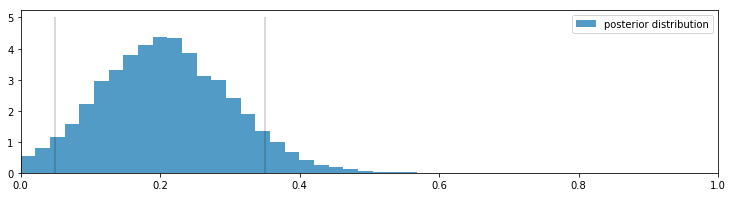

In [13]:
with model:
    # To Be Explained in Chapter 3!
    step = pm.Metropolis()
    trace = pm.sample(25000, step=step)
    burned_trace = trace[2500:]

figsize(12.5, 3)
p_trace = burned_trace["freq_cheating"]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30,
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.legend()
